# **OpenCV**

An opensource library which is supported by multiple platforms including Linux, Windows, Android and MacOS. 
It supports a wide variety of programming languages such as C++, Python, Java etc.
<br>
OpenCV-Python is the Python API for OpenCV, combining the best qualities of the OpenCV C++ API and the Python language.

### Pre-requisites

1. Python 3.x
2. Pip 

To make sure that the Python version you currently have in your system is 3.x, run the below command on your systems terminal or command Prompt

```powershell
$ python3 --version
```
To make sure that PIP package manager is installed on your system

```powershell
$ pip3 --version
```

Or you can confirm the same by executing the below cells


In [ ]:
! echo  'Python Version: '$(python3 --version)


Python Version: Python 3.7.10


In [ ]:
! echo 'PIP Version: ' $(pip3 --version)

PIP Version:  pip 19.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)




---



## **Installing OpenCV-Python**

The [OpenCV-Python](https://pypi.org/project/opencv-python/) package can be installed using the [PIP package manager](https://pip.pypa.io/en/stable/).

To install, run the below command on your terminal or command prompt

```powershell
$ pip3 install opencv-python
```

You can do the same on this notebook as well, by executing the below cell

In [ ]:
! pip3 install opencv-python

After installation is done, confirm the same by checking the version of the package

In [ ]:
import cv2
print(f'OpenCV-Python Version: {cv2.__version__}')

OpenCV-Python Version: 4.1.2




---



## **Now, let's dive into OpenCV**

Before diving into OpenCV, let's import few packages that we will be using throghout this notebook
1. OpenCV
2. [Numpy](https://numpy.org/)
3. [Matplotlib](https://matplotlib.org/)
4. [os](https://docs.python.org/3/library/os.html)

run the below cell to import them

In [104]:
import os
import cv2 # OpenCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's set the path of the image directory

In [137]:
image_directory = 'images/'

Let's create a method to plot the images

In [106]:
# Method to plot the images
def plot_images(original, result=None):
  """Plot the images using matplotlib libray"""
  # Plot single image
  if result is None:
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.show()
    return
  
  #Plot two images
  f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,15))
  axis1.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
  axis1.set_title('Origianl Image')
  axis2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
  axis2.set_title('Resultant Image')
  return

### **1. Changing colorspaces**

There are more than 150 color-space conversion methods available in OpenCV. We will take a look at two of the widely used methods - 
<br> BGR ↔ Gray and BGR ↔ HSV

**BGR** - Blue-Green-Red <br>
**HSV** - Hue- Saturation-Lightness

For color conversion, we can make use of the function `cv.cvtColor(input_image, flag)` where `flag` determines the type of conversion.

Here, we will try to extract a blue colored object from an image by following the below steps

1. Read the image
2. Convert from BGR to HSV color-space
3. Threshold the HSV image for a range of blue color

In [ ]:
# Read the input image
image = cv2.imread('images/color_spaces.jpg', cv2.IMREAD_COLOR)

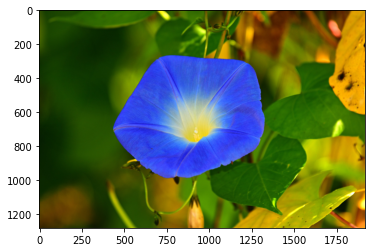

In [ ]:
# Plot the image using matplotlib
plot_images(image)

In [ ]:
 # Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [ ]:
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

In [ ]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask=mask)

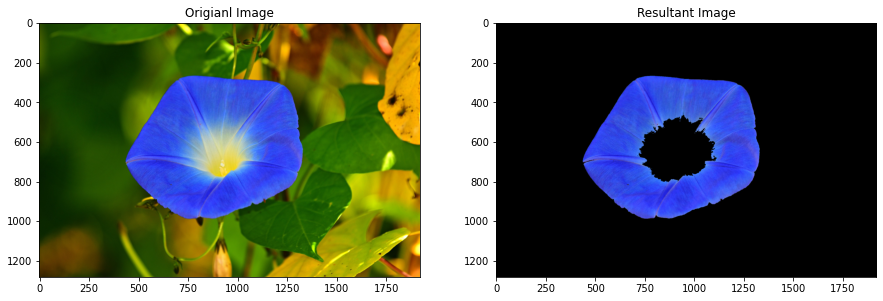

In [ ]:
# Plot the result image using matplotlib
plot_images(image, res)



---




### **2. Geometric Transformations of Images**

#### **1. Scaling**

Scaling is just resizing of the image. OpenCV comes with a function `cv.resize()` for this purpose. 

Preferable interpolation methods are 
1. `cv.INTER_AREA` for shrinking 
2. `cv.INTER_CUBIC` (slow) 
3. `cv.INTER_LINEAR` for zooming

By default `cv.INTER_LINEAR` is used for all resizing purposes

Let's try resizing an image;

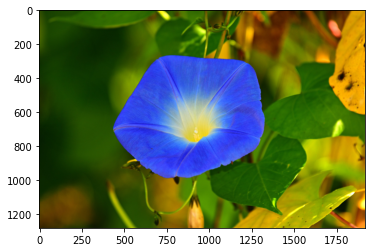

In [ ]:
# Read the image
image = cv2.imread('images/color_spaces.jpg', cv2.IMREAD_COLOR)

# Plot the image using matplotlib
plot_images(image)

In [ ]:
# Apply resize with `INTER_CUBIC` Interpolation - 10 times the size of input image
res = cv2.resize(image, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)

Original size: (1281, 1920, 3) 
Resized image size: (12810, 19200, 3)


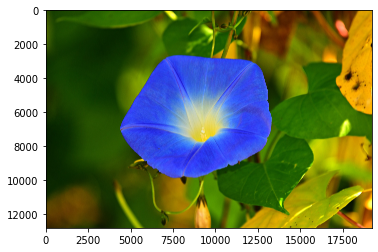

In [ ]:
print(f'Original size: {image.shape} \nResized image size: {res.shape}')
plot_images(res)

#### **2. Translation**

Translation is the shifting of an image along the x- and y-axis. Using translation, we can shift an image up, down, left, or right, along with any combination of the above.

If you want to rotate an image `tx` pixels along x-axis and `ty` pixels along y-axis, the tranformation matrix will be <br> `[1, 0, tx][0, 1, ty]`

Translation can be done by applying this transformation metrics to the method `cv2.warpAffine()`.


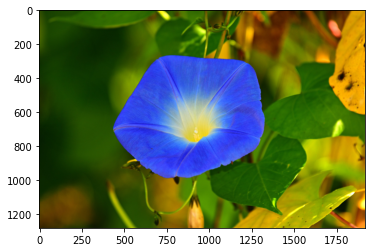

In [107]:
# Read the image
image = cv2.imread('images/color_spaces.jpg', cv2.IMREAD_COLOR)

# Plot the image using matplotlib
plot_images(image)

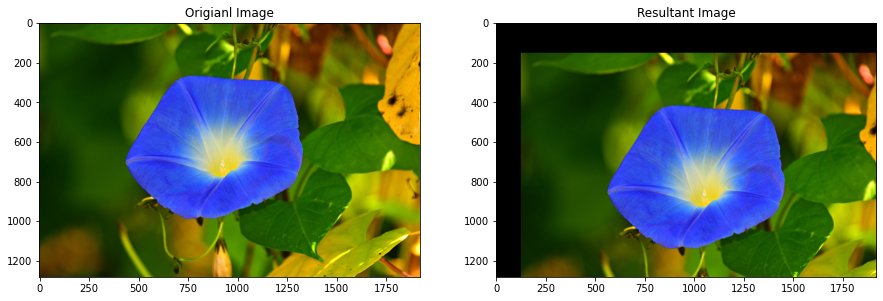

In [110]:
# Shift the image 125 pixels to the right and 150 pixels down
M = np.float32([[1, 0, 125], [0, 1, 150]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# plot the image
plot_images(image, shifted)

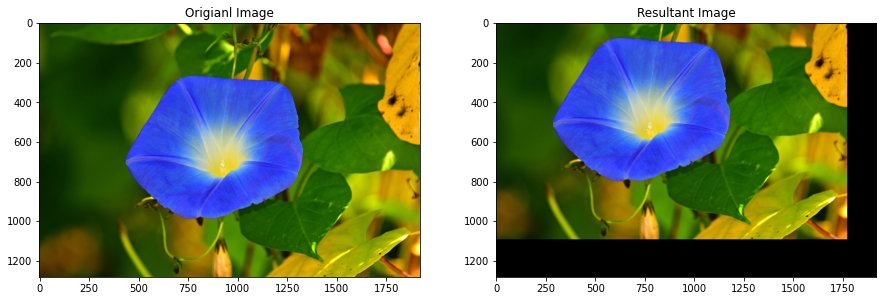

In [113]:
# Shift the image 150 pixels to the left and 190 pixels up
M = np.float32([[1, 0, -150], [0, 1, -190]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# plot the image
plot_images(image, shifted)

#### **3. Rotation**

OpenCV provides a function, `cv.getRotationMatrix2D` to create a transformation matrix, which can be applied to the image using the method `cv.warpAffine()`

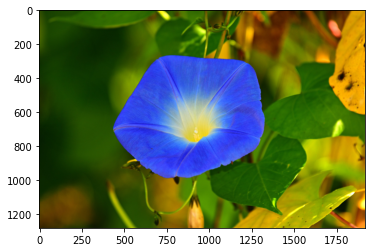

In [114]:
# Read the image
image = cv2.imread('images/color_spaces.jpg', cv2.IMREAD_COLOR)

# Plot the image using matplotlib
plot_images(image)

In [115]:
# grab the dimensions of the image and calculate the center of the image
(height, width) = image.shape[:2]
(cX, cY) = (width // 2, height // 2)

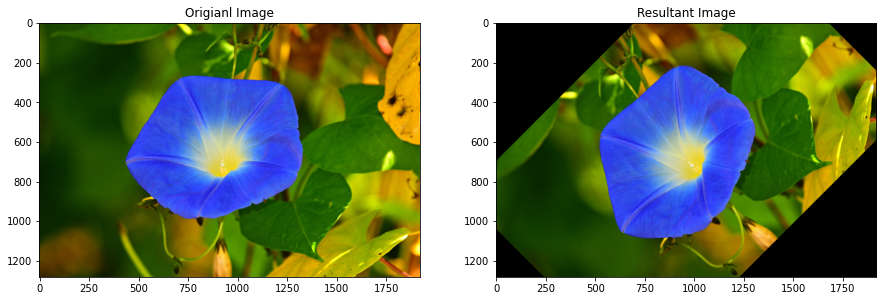

In [120]:
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (width, height))
plot_images(image, rotated)

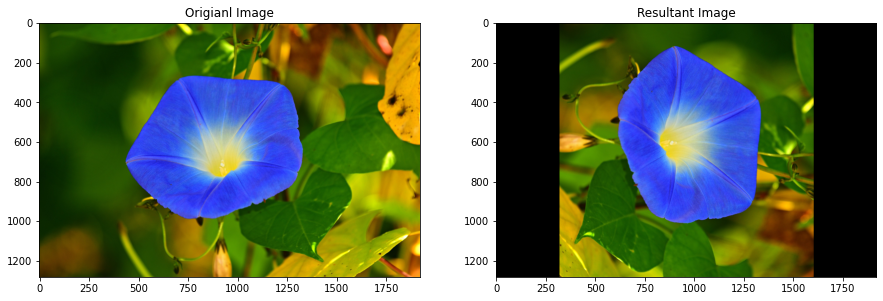

In [118]:
# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (width, height))
plot_images(image, rotated)

#### **5. Affine Transformation**

To be added

#### **6. Perspective Transformation**

To be added

### **3. Image Thresholding**

#### **1. Simple Thresholding**

For every pixel, a threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.

The function `cv.threshold` is used to apply the thresholding.

OpenCV provides different types of thresholding 
1. `cv.THRESH_BINARY`
2. `cv.THRESH_BINARY_INV`
3. `cv.THRESH_TRUNC`
4. `cv.THRESH_TOZERO`
5. `cv.THRESH_TOZERO_INV`

Detailed explanation about this different methods can be found [here](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576).

*Note: The input image must be a gray scale image*

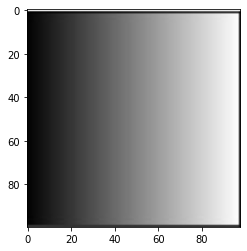

In [154]:
# read the input image
image = cv2.imread('images/simple_threshold.PNG',0)

# Plot the images
plot_images(image)

In [133]:
# Apply various thershold methods
ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)

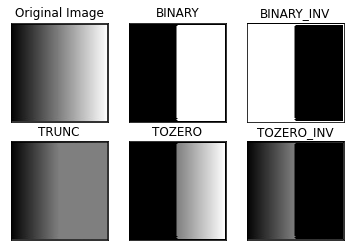

In [134]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### **2. Adaptive Thresholding**

Using one global value for thresholding might not be good in all cases eg. if the image has different lighting conditions in different areas. 

**Adaptive Thresholding** determines the threshold for a pixel based on a small region around it. This can produce different thresholds for different regions of the same image which gives better results for image with varying illuminations. The method `cv.adaptiveThreshold` is used for it.

Two different methods of calculating the threshold
1. `cv.ADAPTIVE_THRESH_MEAN_C`: The threshold value is the mean of the neighbourhood area minus the constant C.
2. `cv.ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

The `blockSize` determines the size of the neighbourhood area and `C` is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

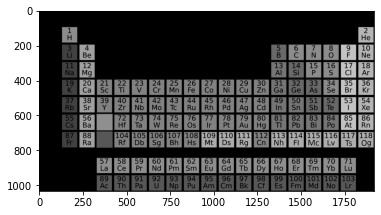

In [163]:
# Read the image
image = cv2.imread(f'{image_directory}calender.jpg',0)

# plot the image
plot_images(image)

In [152]:
# Apply the thresholding methods to the image
ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
thresh3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

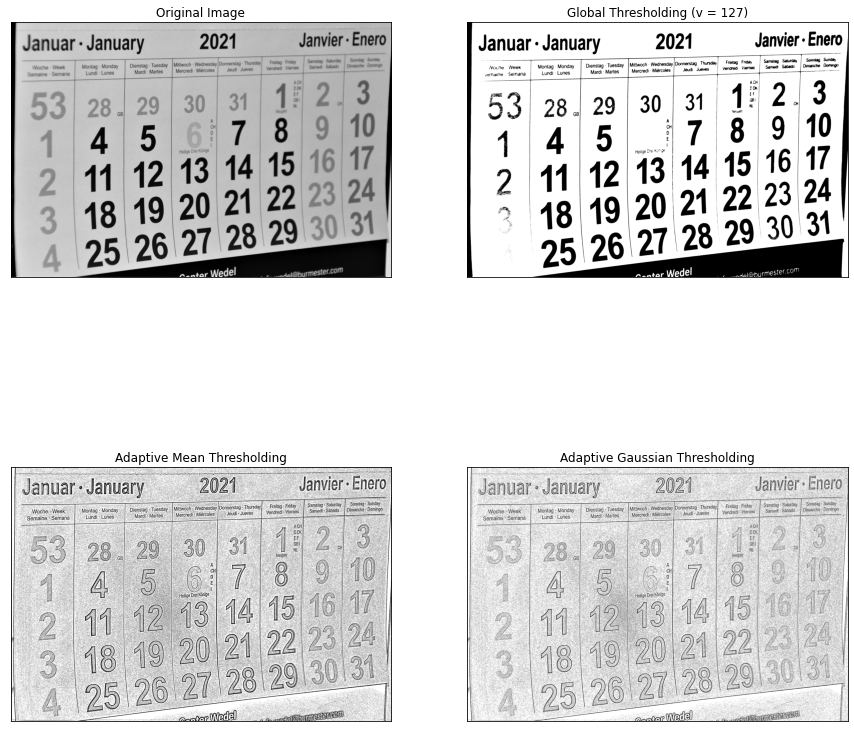

In [153]:
# Plot the thresholding resultant images
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

plot_images(image, thresh1)
images = [image, thresh1, thresh2, thresh3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### **3. Otsu's Binarization**

Otsu's method avoids having to choose an arbitrary value as threshold and determines it automatically.

Determines an optimal global threshold value from the image histogram.

The ` cv.threshold()` function is used, where `cv.THRESH_OTSU` is passed as an extra flag.

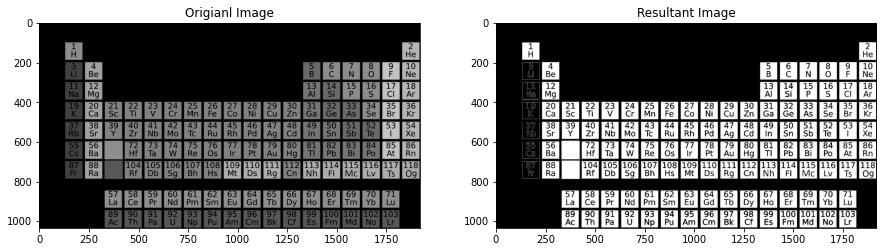

In [168]:
# Read input image
image = cv2.imread(f'{image_directory}periodic_table.png',0)

# Otsu's thresholding
ret2,thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plot_images(image, thresh)

### **4. Smoothing Images**

#### **1. 2D Convolution ( Image Filtering )**

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

The function `cv.filter2D()` is used to convolve a kernel with an image.

For example, lets try applying the  5x5 averaging filter kernel below

In [169]:
kernel = np.ones((5,5),np.float32)/25
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


The operation works like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take the average, and replace the central pixel with the new average value

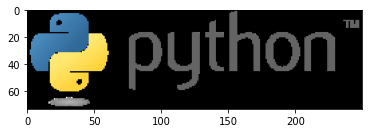

In [171]:
# Read input image
image = cv2.imread(f'{image_directory}python_logo.png')

# Plot the image
plot_images(image)

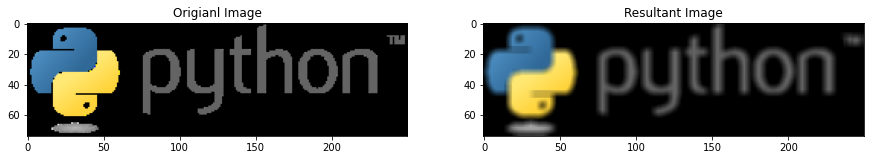

In [174]:
# Apply the kernel
result = cv2.filter2D(image,-1,kernel)
plot_images(image, result)

#### **2. Image Blurring (Image Smoothing)**

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise.

OpenCV provides four different type of blurring techniques







##### **1. Averaging**
This is done by convolving an image with a normalized box filter. (as explained above in 2D convolution section)
The function `cv.blur()` can be used for averaging.

In [176]:
# apply the averaging kernel
blur = cv2.blur(image,(5,5))

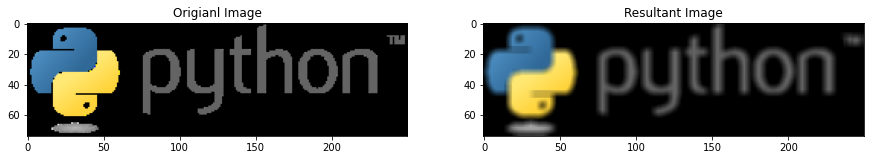

In [177]:
# plot the image
plot_images(image, blur)

##### **2. Gaussian Blurring**
In this method, instead of a box filter, a Gaussian kernel is used. The function `cv.GaussianBlur()` is used. <br>
Gaussian blurring is highly effective in removing Gaussian noise from an image.

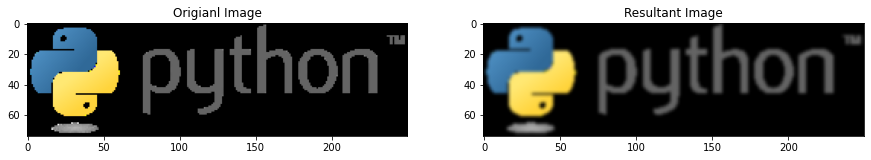

In [179]:
# Apply gaussian blur
blur = cv2.GaussianBlur(image,(5,5),0)

# Plot the image
plot_images(image, blur)

##### **3. Median Blurring**
The function `cv.medianBlur()` takes the median of all the pixels under the kernel area and the central element is replaced with this median value. <br>
Effective against removing salt and pepper noises.

In [192]:
# Add the Gaussian noise to the image - salt and pepper noise

# Generate Gaussian noise
gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')

# add generated noise to the image
image_gauss = cv2.add(image,gauss)

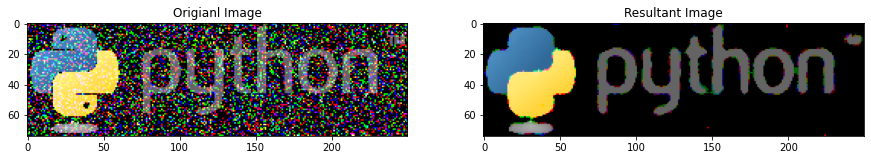

In [193]:
# Apply kernel to the image
median = cv2.medianBlur(image_gauss,5)

#plot the image
plot_images(image_gauss, median)

##### **4. Bilateral Filtering**

`cv.bilateralFilter()` is highly effective in noise removal while keeping edges sharp.

This filter preserve edges by considering Gaussian function of intensity difference that makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. 

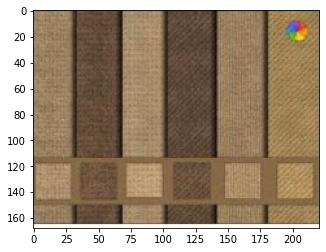

In [204]:
# Load the input image
image = cv2.imread(f'{image_directory}pattern.PNG')

#plot the images
plot_images(image)

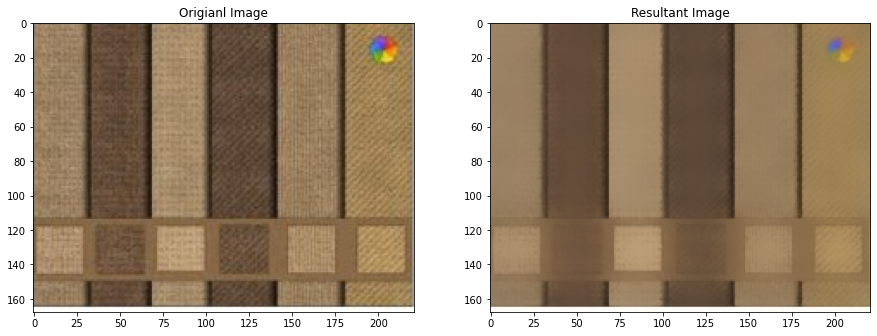

In [205]:
# Apply the filer
blur = cv2.bilateralFilter(image,25,75,75)

#plot the images
plot_images(image, blur)

### **5. Morphological Transformations**

Morpholofical operations are simple operatins(kernels) performed on a binary image based on its shape.

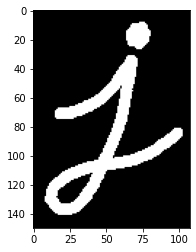

In [212]:
# read the input image
image = cv2.imread(f'{image_directory}morphology.PNG')

# Plot the image
plot_images(image)

In [214]:
# create a 5x5 kernel
kernel = np.ones((5,5),np.uint8)

#### **1. Erosion**

Erodes the bounderies of a forground object.

Operaion of the erosion is as follows, a kernel slides through the image and if the pixel under the kernel is not 1, then its eroded(zero). Basically erodes the bounderies of an object.

It is useful for removing small white noises, detach two connected object etc.

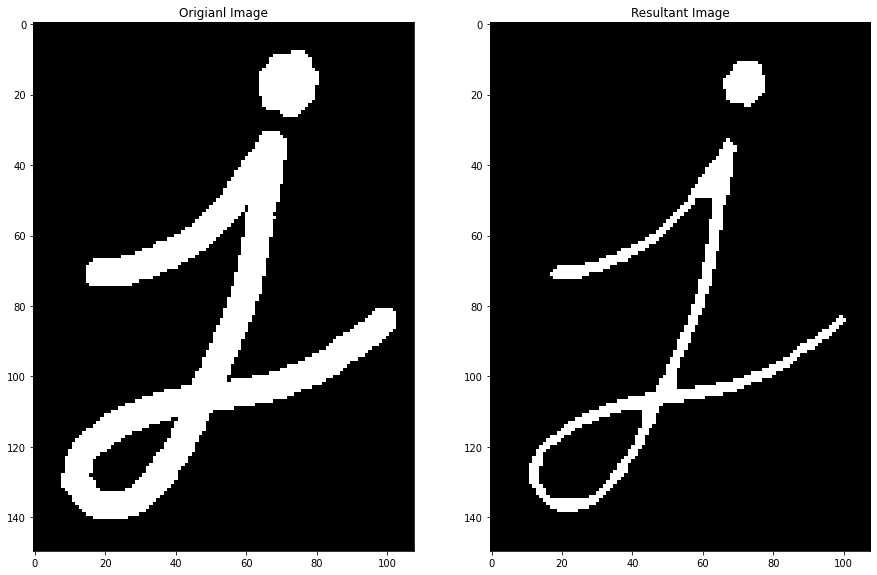

In [213]:
# Apply the kenel to the input image
erosion = cv2.erode(image,kernel,iterations = 1)

# Plot the result image
plot_images(image, erosion)

#### **2. Dilation**

Dilation is opposite of erosion. A pixel element is 1, if atleast one pixel value under a kernel is 1.


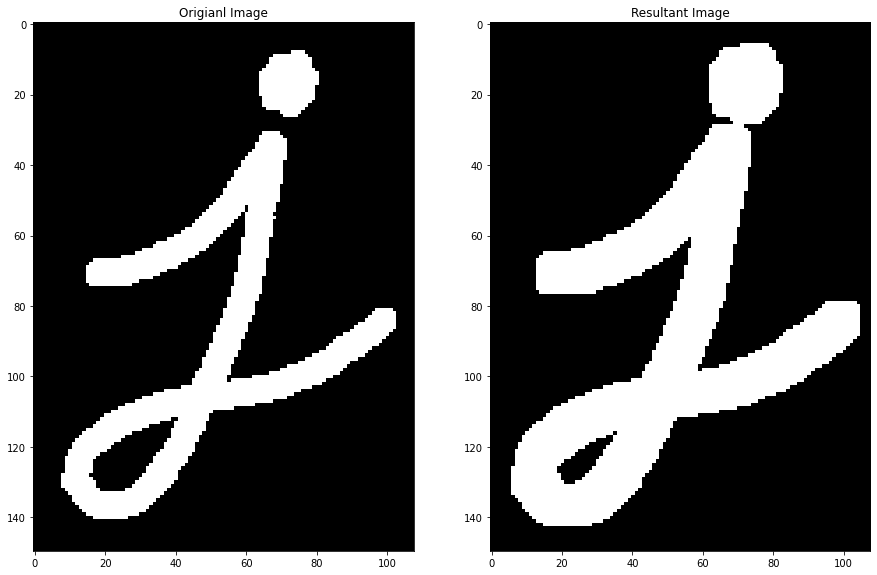

In [216]:
# apply the kernel
dilation = cv2.dilate(image, kernel,iterations = 1)

# Plot the images
plot_images(image, dilation)

#### **3. Opening**

Opening is just another name of erosion followed by dilation. 
Method used `cv.morphologyEx()`

Userful for removing whitenoise.

In [233]:
# Add the Gaussian noise to the image - salt and pepper noise

# Generate Gaussian noise
gauss = np.random.normal(0,0.5,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')

# add generated noise to the image
image_gauss = cv2.add(image,gauss)

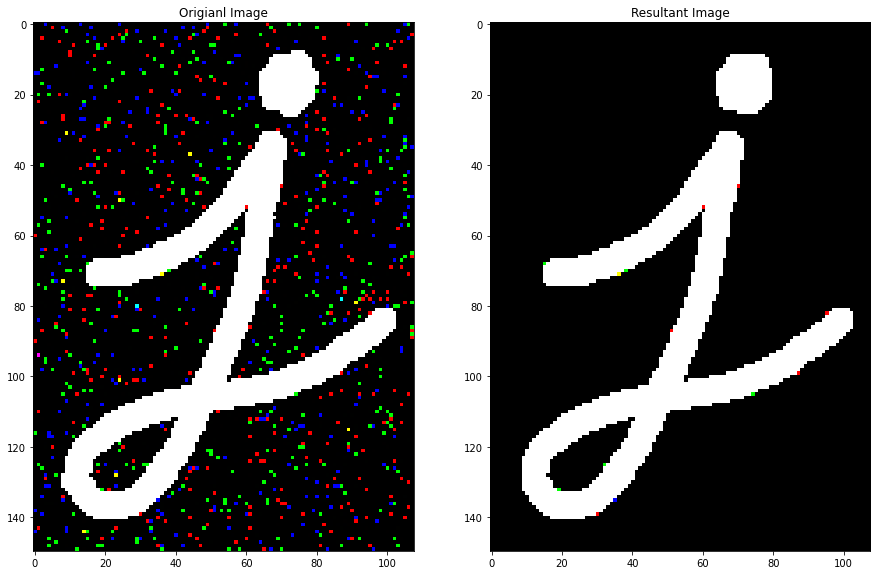

In [234]:
# Apply the kernel
opening = cv2.morphologyEx(image_gauss, cv2.MORPH_OPEN, kernel)

# plot the image
plot_images(image_gauss, opening)

#### **4. Closing**

Closing is reverse of Opening, Dilation followed by Erosion. 
<br> 
It is useful in closing small holes inside the foreground objects, or small black points on the object.

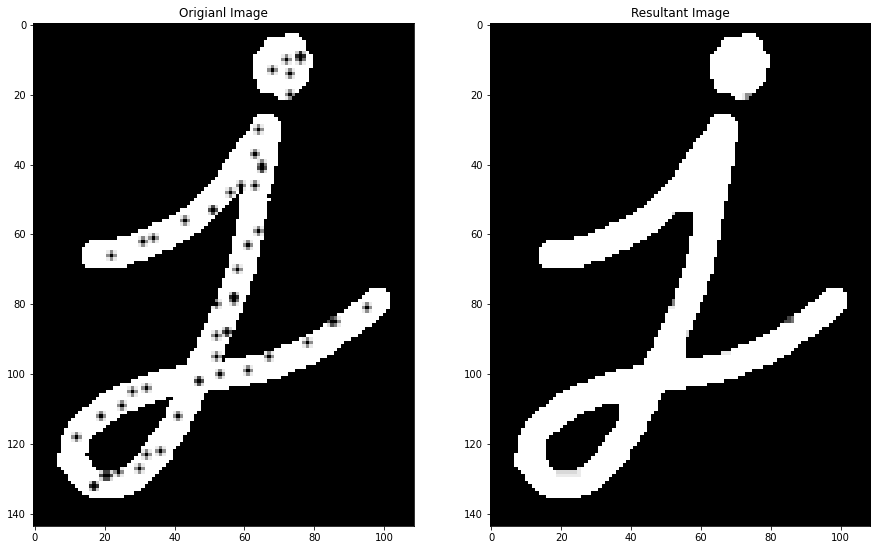

In [237]:
# read the input image
image = cv2.imread(f'{image_directory}morphology_closing.PNG')

# apply the kernel
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Plot the images
plot_images(image, closing)

#### **5. Morphological Gradient**
It is the difference between dilation and erosion of an image.

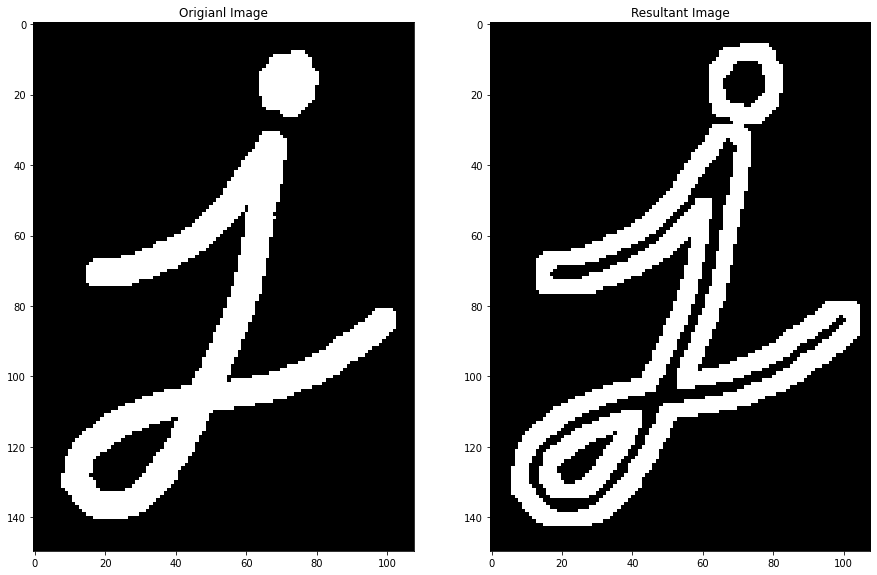

In [239]:
# read the image
image = cv2.imread(f'{image_directory}morphology.PNG')

# Apply the kernel to the image
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# Plot the images
plot_images(image, gradient)

### **6. Canny Edge Detection**

To be updated.